In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

In [ ]:
%%writefile /content/drive/MyDrive/GalapagosSealsMerged/data.yaml
train: /content/drive/MyDrive/GalapagosSealsMerged/train/images
val: /content/drive/MyDrive/GalapagosSealsMerged/val/images
test: /content/drive/MyDrive/GalapagosSealsMerged/test/images

nc: 1
names: ['sea-lion']

Overwriting /content/drive/MyDrive/GalapagosSealsMerged/data.yaml


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data="/content/drive/MyDrive/GalapagosSealsMerged/data.yaml" epochs=100 imgsz=640 project=/content/drive/MyDrive/GalapagosSealsMerged/runs/detect

Ultralytics 8.3.188 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/GalapagosSealsMerged/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

In [ ]:
from ultralytics import YOLO

# Define the path to your trained model weights in Google Drive
model_path = '/content/drive/MyDrive/GalapagosSealsMerged/runs/detect/train/weights/best.pt' # Assuming 'best.pt' is the saved model

# Load the trained YOLOv8 model
model = YOLO(model_path)

print(f"Model loaded successfully from {model_path}")

Model loaded successfully from /content/drive/MyDrive/GalapagosSealsMerged/runs/detect/train/weights/best.pt


In [ ]:
import os

# Define the path to the directory where the model should be
model_dir = '/content/drive/MyDrive/GalapagosSealsMerged/runs/detect/train/weights/'

# Check if the directory exists
if os.path.exists(model_dir):
    print(f"Contents of {model_dir}:")
    # List the contents of the directory
    print(os.listdir(model_dir))
else:
    print(f"Directory not found: {model_dir}")

Contents of /content/drive/MyDrive/GalapagosSealsMerged/runs/detect/train/weights/:
['last.pt', 'best.pt']


In [ ]:
import os
from PIL import Image

# Define the base path to your dataset in Google Drive
dataset_base_path = '/content/drive/MyDrive/my_galapagos_seals_dataset'

# Define the directories for train, validation, and test sets
subsets = ['train', 'validation', 'test']
classes = ['Zalophus_wollebaeki', 'Arctocephalus_galapagoensis']

# Dictionary to store image paths
image_paths = {}

for subset in subsets:
    image_paths[subset] = []
    for seal_class in classes:
        # Updated path: removed 'images' subfolder
        class_path = os.path.join(dataset_base_path, subset, seal_class)
        if os.path.exists(class_path):
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths[subset].append(os.path.join(class_path, img_name))
        else:
            print(f"Directory not found: {class_path}")


# Perform inference on each image
results = {}
for subset in subsets:
    results[subset] = []
    print(f"Running inference on {subset} set...")
    for img_path in image_paths[subset]:
        try:
            # Run inference
            detection_results = model(img_path)
            results[subset].append({'image_path': img_path, 'detections': detection_results})
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

print("Inference complete.")

Running inference on train set...

image 1/1 /content/drive/MyDrive/my_galapagos_seals_dataset/train/Zalophus_wollebaeki/12465703.jpg: 416x640 2 sea-lions, 41.8ms
Speed: 2.4ms preprocess, 41.8ms inference, 102.0ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/drive/MyDrive/my_galapagos_seals_dataset/train/Zalophus_wollebaeki/7842941.jpg: 480x640 1 sea-lion, 66.9ms
Speed: 8.8ms preprocess, 66.9ms inference, 70.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/my_galapagos_seals_dataset/train/Zalophus_wollebaeki/32680757.jpg: 448x640 1 sea-lion, 223.3ms
Speed: 8.3ms preprocess, 223.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/my_galapagos_seals_dataset/train/Zalophus_wollebaeki/62389458.jpg: 640x448 2 sea-lions, 62.2ms
Speed: 3.3ms preprocess, 62.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/drive/MyDrive/my_galapagos_seals_dataset

In [ ]:
import os
from PIL import Image

# Define the base path for saving the cropped dataset in Google Drive
cropped_dataset_base_path = '/content/drive/MyDrive/my_galapagos_seals_cropped_dataset'

# Create the base directory for the cropped dataset
os.makedirs(cropped_dataset_base_path, exist_ok=True)

# Iterate through the inference results
for subset, results_list in results.items():
    print(f"Processing {subset} set for cropping...")
    subset_output_path = os.path.join(cropped_dataset_base_path, subset)
    os.makedirs(subset_output_path, exist_ok=True)

    for item in results_list:
        img_path = item['image_path']
        detections = item['detections']

        try:
            # Open the original image
            img = Image.open(img_path).convert('RGB')

            # Process each detection in the image
            for i, det in enumerate(detections[0].boxes):
                # Get bounding box coordinates
                x1, y1, x2, y2 = det.xyxy[0].cpu().numpy().astype(int)

                # Get the class label (assuming your model predicts the single 'sea-lion' class)
                # Since we only trained for one class, we can assign the original class based on the input path
                original_class = os.path.basename(os.path.dirname(img_path))

                # Define the output directory for the cropped image based on the original class and subset
                class_output_path = os.path.join(subset_output_path, original_class)
                os.makedirs(class_output_path, exist_ok=True)

                # Define the filename for the cropped image
                original_filename = os.path.basename(img_path)
                cropped_filename = f"{os.path.splitext(original_filename)[0]}_crop_{i}.jpg"
                cropped_img_path = os.path.join(class_output_path, cropped_filename)

                # Crop the image using the bounding box
                cropped_img = img.crop((x1, y1, x2, y2))

                # Save the cropped image
                cropped_img.save(cropped_img_path)

        except Exception as e:
            print(f"Error cropping image {img_path}: {e}")

print("Cropping and saving complete. The new dataset is located at:", cropped_dataset_base_path)

Processing train set for cropping...
Processing validation set for cropping...
Processing test set for cropping...
Cropping and saving complete. The new dataset is located at: /content/drive/MyDrive/my_galapagos_seals_cropped_dataset


In [ ]:
import tensorflow as tf

# Define the base path to the cropped dataset in Google Drive
cropped_dataset_base_path = '/content/drive/MyDrive/my_galapagos_seals_cropped_dataset'

# Define image dimensions
img_height = 224  # VGG16, ResNet50V2 and InceptionV3 typically use 224x224 or larger
img_width = 224

# Define batch size
batch_size = 32

# Load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(cropped_dataset_base_path, 'train'),
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(cropped_dataset_base_path, 'validation'),
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False # No need to shuffle validation data
)

# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(cropped_dataset_base_path, 'test'),
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False # No need to shuffle test data
)

print("Datasets loaded successfully.")

Found 449 files belonging to 2 classes.
Found 60 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Datasets loaded successfully.


In [ ]:
import numpy as np

# Get the class names from the training dataset
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Count the number of images in each class in the training set
train_counts = {class_name: 0 for class_name in class_names}
for images, labels in train_ds:
    for label in labels.numpy():
        class_index = np.argmax(label)
        train_counts[class_names[class_index]] += 1

print("\nTraining set class distribution:")
total_train_images = sum(train_counts.values())
for class_name, count in train_counts.items():
    percentage = (count / total_train_images) * 100
    print(f"{class_name}: {count} images ({percentage:.2f}%)")

# You can do the same for validation and test sets if needed
# val_counts = {class_name: 0 for class_name in class_names}
# for images, labels in val_ds:
#     for label in labels.numpy():
#         class_index = np.argmax(label)
#         val_counts[class_names[class_index]] += 1

# test_counts = {class_name: 0 for class_name in class_names}
# for images, labels in test_ds:
#     for label in labels.numpy():
#         class_index = np.argmax(label)
#         test_counts[class_names[class_index]] += 1

# print("\nValidation set class distribution:")
# for class_name, count in val_counts.items():
#     percentage = (count / sum(val_counts.values())) * 100
#     print(f"{class_name}: {count} images ({percentage:.2f}%)")

# print("\nTest set class distribution:")
# for class_name, count in test_counts.items():
#     percentage = (count / sum(test_counts.values())) * 100
#     print(f"{class_name}: {count} images ({percentage:.2f}%)")

Class names: ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']

Training set class distribution:
Arctocephalus_galapagoensis: 45 images (10.02%)
Zalophus_wollebaeki: 404 images (89.98%)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = len(class_names)

# Load the VGG16 model with pre-trained weights (excluding the top classification layer)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
vgg16_base.trainable = False

# Create the VGG16 classification model
vgg16_model_imbalanced = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
vgg16_model_imbalanced.compile(optimizer=Adam(learning_rate=0.001),
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])

# Print the model summary
vgg16_model_imbalanced.summary()

print("VGG16 model for imbalanced dataset compiled.")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

VGG16 model for imbalanced dataset compiled.


In [ ]:
import json
import os

# Define the path to save the model and configuration
save_dir = '/content/drive/MyDrive/GalapagosSealsMerged/classification_models/vgg16_imbalanced'
os.makedirs(save_dir, exist_ok=True)

# Define callbacks for training (optional but recommended)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir, 'best_vgg16_imbalanced_model.h5'),
                                       monitor='val_loss',
                                       save_best_only=True)
]

# Train the VGG16 model on the imbalanced dataset
history_vgg16_imbalanced = vgg16_model_imbalanced.fit(
    train_ds,
    epochs=50, # You can adjust the number of epochs
    validation_data=val_ds,
    callbacks=callbacks
)

# Save the trained model (best weights)
# The ModelCheckpoint callback already saved the best model, but we can also save the final model
vgg16_model_imbalanced.save(os.path.join(save_dir, 'final_vgg16_imbalanced_model.h5'))

# Save the model configuration
model_config = vgg16_model_imbalanced.to_json()
with open(os.path.join(save_dir, 'vgg16_imbalanced_config.json'), 'w') as f:
    json.dump(json.loads(model_config), f, indent=4)

print(f"\nVGG16 model for imbalanced dataset trained and saved to {save_dir}")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7691 - loss: 14.2045

15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7732 - loss: 14.1576 - val_accuracy: 0.9333 - val_loss: 13.9730
Epoch 2/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9670 - loss: 2.4586

15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.9647 - loss: 2.4797 - val_accuracy: 0.9333 - val_loss: 9.2899
Epoch 3/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9895 - loss: 0.9207

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9883 - loss: 0.9723 - val_accuracy: 0.9333 - val_loss: 7.9584
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.9766 - loss: 0.6636 - val_accuracy: 0.9333 - val_loss: 13.0804
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9861 - loss: 0.4918 - val_accuracy: 0.9333 - val_loss: 8.9150
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9918 - loss: 0.2088 - val_accuracy: 0.9333 - val_loss: 14.7298
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9974 - loss: 0.0455 - val_accuracy: 0.9333 - val_loss: 13.8788
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9926 - loss: 0.1754 - val_accuracy: 0.9333 - val_loss: 12.9082
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9978 - loss: 0.2390 - val_accuracy: 0.9167 - val_loss: 11.7980
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9969 - loss: 0.0894 - val_accuracy: 0.9333 


VGG16 model for imbalanced dataset trained and saved to /content/drive/MyDrive/GalapagosSealsMerged/classification_models/vgg16_imbalanced


In [ ]:
# Evaluate the VGG16 model on the imbalanced validation set
print("Evaluating VGG16 model on the imbalanced validation set:")
val_loss_imbalanced, val_accuracy_imbalanced = vgg16_model_imbalanced.evaluate(val_ds)
print(f"Validation Loss (Imbalanced): {val_loss_imbalanced:.4f}")
print(f"Validation Accuracy (Imbalanced): {val_accuracy_imbalanced:.4f}")

# Evaluate the VGG16 model on the imbalanced test set
print("\nEvaluating VGG16 model on the imbalanced test set:")
test_loss_imbalanced, test_accuracy_imbalanced = vgg16_model_imbalanced.evaluate(test_ds)
print(f"Test Loss (Imbalanced): {test_loss_imbalanced:.4f}")
print(f"Test Accuracy (Imbalanced): {test_accuracy_imbalanced:.4f}")

Evaluating VGG16 model on the imbalanced validation set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9139 - loss: 10.2796
Validation Loss (Imbalanced): 7.9584
Validation Accuracy (Imbalanced): 0.9333

Evaluating VGG16 model on the imbalanced test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 10s/step - accuracy: 0.8933 - loss: 7.7916
Test Loss (Imbalanced): 5.9839
Test Accuracy (Imbalanced): 0.9180


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Classification Report for VGG16 model on Imbalanced Test Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       1.00      0.17      0.29         6
        Zalophus_wollebaeki       0.92      1.00      0.96        55

                   accuracy                           0.92        61
                  macro avg       0.96      0.58      0.62        61
               weighted avg       0.92      0.92      0.89        61



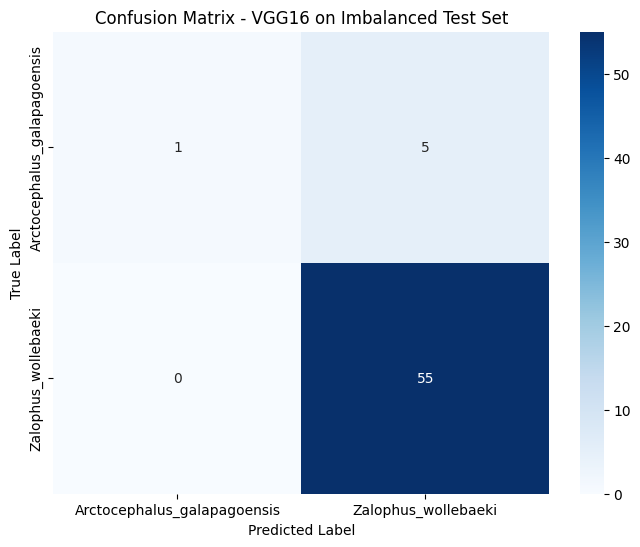

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step

Classification Report for VGG16 model on Imbalanced Validation Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.50      0.25      0.33         4
        Zalophus_wollebaeki       0.95      0.98      0.96        56

                   accuracy                           0.93        60
                  macro avg       0.72      0.62      0.65        60
               weighted avg       0.92      0.93      0.92        60



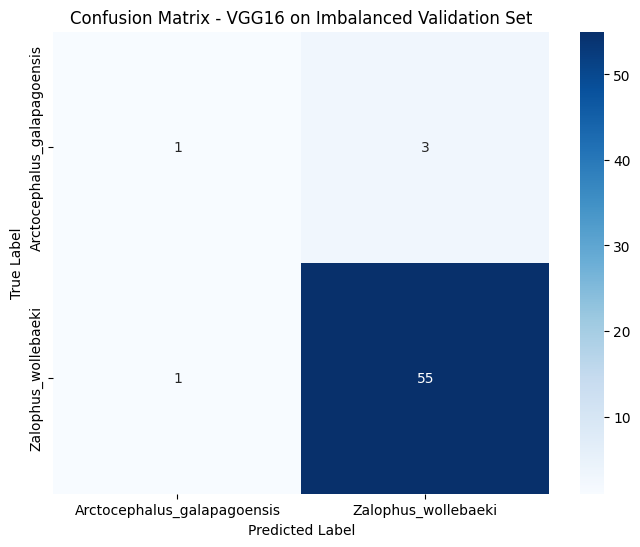

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names
class_names = test_ds.class_names

# --- Evaluate on Test Set ---
# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(np.argmax(labels.numpy(), axis=1))
test_true_labels = np.array(test_true_labels)

# Get predicted labels from the VGG16 model on the test dataset
test_predictions = vgg16_model_imbalanced.predict(test_ds)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate and print the classification report for the test set
print("Classification Report for VGG16 model on Imbalanced Test Set:")
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_names))

# Generate confusion matrix for the test set
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Plot confusion matrix for the test set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG16 on Imbalanced Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate on Validation Set ---
# Get true labels from the validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(np.argmax(labels.numpy(), axis=1))
val_true_labels = np.array(val_true_labels)

# Get predicted labels from the VGG16 model on the validation dataset
val_predictions = vgg16_model_imbalanced.predict(val_ds)
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Generate and print the classification report for the validation set
print("\nClassification Report for VGG16 model on Imbalanced Validation Set:")
print(classification_report(val_true_labels, val_predicted_labels, target_names=class_names))

# Generate confusion matrix for the validation set
val_cm = confusion_matrix(val_true_labels, val_predicted_labels)

# Plot confusion matrix for the validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG16 on Imbalanced Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = len(class_names)

# Load the ResNet50V2 model with pre-trained weights (excluding the top classification layer)
resnet_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
resnet_base.trainable = False

# Create the ResNet50V2 classification model
resnet_model_imbalanced = Sequential([
    resnet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
resnet_model_imbalanced.compile(optimizer=Adam(learning_rate=0.001),
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

# Print the model summary
resnet_model_imbalanced.summary()

print("ResNet50V2 model for imbalanced dataset compiled.")

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,255,682 (187.90 MB)

 Trainable params: 25,690,882 (98.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

ResNet50V2 model for imbalanced dataset compiled.


In [ ]:
import json
import os

# Define the path to save the ResNet50V2 model and configuration
save_dir_resnet = '/content/drive/MyDrive/GalapagosSealsMerged/classification_models/resnet50v2_imbalanced'
os.makedirs(save_dir_resnet, exist_ok=True)

# Define callbacks for training (optional but recommended)
callbacks_resnet = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir_resnet, 'best_resnet50v2_imbalanced_model.h5'),
                                       monitor='val_loss',
                                       save_best_only=True)
]

# Train the ResNet50V2 model on the imbalanced dataset
history_resnet_imbalanced = resnet_model_imbalanced.fit(
    train_ds,
    epochs=50, # You can adjust the number of epochs
    validation_data=val_ds,
    callbacks=callbacks_resnet
)

# Save the trained model (best weights)
resnet_model_imbalanced.save(os.path.join(save_dir_resnet, 'final_resnet50v2_imbalanced_model.h5'))

# Save the model configuration
model_config_resnet = resnet_model_imbalanced.to_json()
with open(os.path.join(save_dir_resnet, 'resnet50v2_imbalanced_config.json'), 'w') as f:
    json.dump(json.loads(model_config_resnet), f, indent=4)

print(f"\nResNet50V2 model for imbalanced dataset trained and saved to {save_dir_resnet}")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7604 - loss: 991.0201

15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7657 - loss: 986.8154 - val_accuracy: 0.9333 - val_loss: 166.2641
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.8705 - loss: 377.8876 - val_accuracy: 0.9333 - val_loss: 213.2602
Epoch 3/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8853 - loss: 227.3781 

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.8846 - loss: 222.7176 - val_accuracy: 0.9500 - val_loss: 72.1543
Epoch 4/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9056 - loss: 109.0097

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9049 - loss: 107.7115 - val_accuracy: 0.9333 - val_loss: 24.2824
Epoch 5/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9162 - loss: 24.2508

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - accuracy: 0.9139 - loss: 24.0156 - val_accuracy: 0.9333 - val_loss: 13.8637
Epoch 6/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9269 - loss: 11.0212

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.9274 - loss: 11.2028 - val_accuracy: 0.9333 - val_loss: 11.3960
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9357 - loss: 4.2056 - val_accuracy: 0.7000 - val_loss: 12.9645
Epoch 8/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7462 - loss: 24.1070

15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 685ms/step - accuracy: 0.7579 - loss: 23.2003 - val_accuracy: 0.9333 - val_loss: 6.2349
Epoch 9/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9331 - loss: 4.3877

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.9309 - loss: 4.3758 - val_accuracy: 0.9333 - val_loss: 1.2914
Epoch 10/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9151 - loss: 1.6774

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.9129 - loss: 1.7059 - val_accuracy: 0.9167 - val_loss: 0.6026
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.8815 - loss: 0.2995 - val_accuracy: 0.9333 - val_loss: 0.9365
Epoch 12/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8654 - loss: 0.5988

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.8646 - loss: 0.5725 - val_accuracy: 0.9000 - val_loss: 0.1799
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.8295 - loss: 0.3275 - val_accuracy: 0.9167 - val_loss: 0.2472
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9291 - loss: 0.5681 - val_accuracy: 0.9333 - val_loss: 0.2388
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.9278 - loss: 0.1825 - val_accuracy: 0.9333 - val_loss: 0.2778
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9347 - loss: 0.1884 - val_accuracy: 0.9167 - val_loss: 0.2719
Epoch 17/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.9277 - loss: 0.1811 - val_accuracy: 0.9167 - val_loss: 0.2070
Epoch 18/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9356 - loss: 0.1707

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 614ms/step - accuracy: 0.9356 - loss: 0.1770 - val_accuracy: 0.9333 - val_loss: 0.1529
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.9305 - loss: 2.5181 - val_accuracy: 0.9333 - val_loss: 0.3278
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9115 - loss: 0.8680 - val_accuracy: 0.9333 - val_loss: 0.2035
Epoch 21/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.9050 - loss: 0.1784

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 848ms/step - accuracy: 0.9068 - loss: 0.1769 - val_accuracy: 0.9333 - val_loss: 0.1439
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9447 - loss: 0.1492 - val_accuracy: 0.9333 - val_loss: 0.1521
Epoch 23/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9410 - loss: 0.1555 - val_accuracy: 0.9333 - val_loss: 0.1505
Epoch 24/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9242 - loss: 0.1151

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.9237 - loss: 0.1187 - val_accuracy: 0.9333 - val_loss: 0.1075
Epoch 25/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9232 - loss: 0.1967 - val_accuracy: 0.9333 - val_loss: 0.1935
Epoch 26/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9173 - loss: 0.1637 - val_accuracy: 0.9333 - val_loss: 0.1314
Epoch 27/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9385 - loss: 0.1288 - val_accuracy: 0.9333 - val_loss: 0.1941
Epoch 28/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9303 - loss: 0.1338 - val_accuracy: 0.9333 - val_loss: 0.1688
Epoch 29/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 671ms/step - accuracy: 0.9314 - loss: 0.1303 - val_accuracy: 0.9333 - val_loss: 0.1677
Epoch 30/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9201 - loss: 0.1262

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.9203 - loss: 0.1271 - val_accuracy: 0.9333 - val_loss: 0.1063
Epoch 31/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9421 - loss: 0.1478 - val_accuracy: 0.9333 - val_loss: 0.1634
Epoch 32/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9238 - loss: 0.1248 - val_accuracy: 0.9333 - val_loss: 0.1670
Epoch 33/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 641ms/step - accuracy: 0.9303 - loss: 0.1053 - val_accuracy: 0.9333 - val_loss: 0.2035
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9340 - loss: 0.1265 - val_accuracy: 0.9333 - val_loss: 0.2020
Epoch 35/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9378 - loss: 0.1672 - val_accuracy: 0.9333 - val_loss: 0.1180
Epoch 36/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9245 - loss: 0.1484 - val_accuracy: 0.9333 - val_loss: 0.1963
Epoch 37/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9383 - loss: 0.1185 - val_accuracy: 0.933


ResNet50V2 model for imbalanced dataset trained and saved to /content/drive/MyDrive/GalapagosSealsMerged/classification_models/resnet50v2_imbalanced


In [ ]:
# Evaluate the ResNet50V2 model on the imbalanced validation set
print("Evaluating ResNet50V2 model on the imbalanced validation set:")
val_loss_resnet_imbalanced, val_accuracy_resnet_imbalanced = resnet_model_imbalanced.evaluate(val_ds)
print(f"Validation Loss (Imbalanced): {val_loss_resnet_imbalanced:.4f}")
print(f"Validation Accuracy (Imbalanced): {val_accuracy_resnet_imbalanced:.4f}")

# Evaluate the ResNet50V2 model on the imbalanced test set
print("\nEvaluating ResNet50V2 model on the imbalanced test set:")
test_loss_resnet_imbalanced, test_accuracy_resnet_imbalanced = resnet_model_imbalanced.evaluate(test_ds)
print(f"Test Loss (Imbalanced): {test_loss_resnet_imbalanced:.4f}")
print(f"Test Accuracy (Imbalanced): {test_accuracy_resnet_imbalanced:.4f}")

Evaluating ResNet50V2 model on the imbalanced validation set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9139 - loss: 0.1261
Validation Loss (Imbalanced): 0.1063
Validation Accuracy (Imbalanced): 0.9333

Evaluating ResNet50V2 model on the imbalanced test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8292 - loss: 0.4505
Test Loss (Imbalanced): 0.3556
Test Accuracy (Imbalanced): 0.8689


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
Classification Report for ResNet50V2 model on Imbalanced Test Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         6
        Zalophus_wollebaeki       0.90      0.96      0.93        55

                   accuracy                           0.87        61
                  macro avg       0.45      0.48      0.46        61
               weighted avg       0.81      0.87      0.84        61



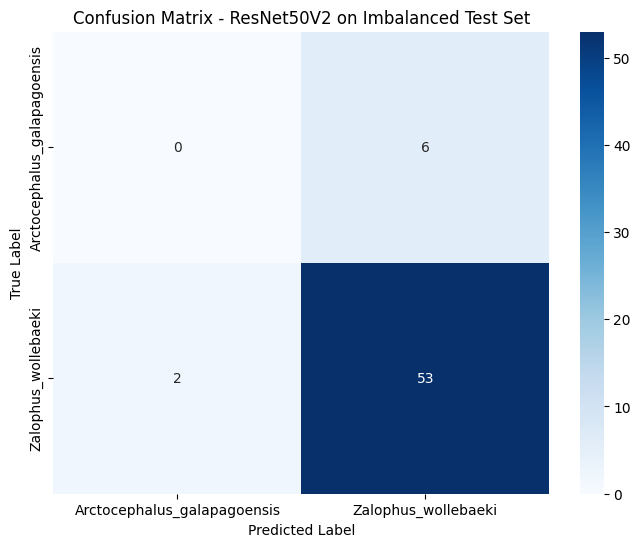

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report for ResNet50V2 model on Imbalanced Validation Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         4
        Zalophus_wollebaeki       0.93      1.00      0.97        56

                   accuracy                           0.93        60
                  macro avg       0.47      0.50      0.48        60
               weighted avg       0.87      0.93      0.90        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


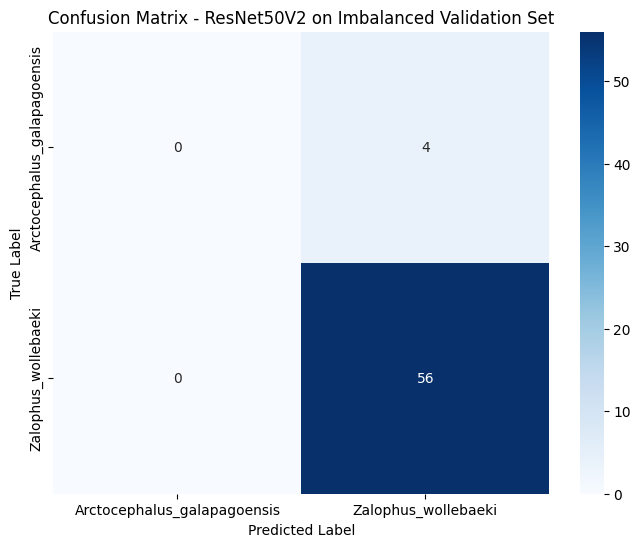

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names (assuming class_names is defined from previous steps)
if 'class_names' not in locals():
    class_names = ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']
    print(f"Using default class names: {class_names}")


# --- Evaluate on Test Set ---
# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(np.argmax(labels.numpy(), axis=1))
test_true_labels = np.array(test_true_labels)

# Get predicted labels from the ResNet50V2 model on the test dataset
test_predictions = resnet_model_imbalanced.predict(test_ds)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate and print the classification report for the test set
print("Classification Report for ResNet50V2 model on Imbalanced Test Set:")
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_names))

# Generate confusion matrix for the test set
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Plot confusion matrix for the test set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - ResNet50V2 on Imbalanced Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate on Validation Set ---
# Get true labels from the validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(np.argmax(labels.numpy(), axis=1))
val_true_labels = np.array(val_true_labels)

# Get predicted labels from the ResNet50V2 model on the validation dataset
val_predictions = resnet_model_imbalanced.predict(val_ds)
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Generate and print the classification report for the validation set
print("\nClassification Report for ResNet50V2 model on Imbalanced Validation Set:")
print(classification_report(val_true_labels, val_predicted_labels, target_names=class_names))

# Generate confusion matrix for the validation set
val_cm = confusion_matrix(val_true_labels, val_predicted_labels)

# Plot confusion matrix for the validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - ResNet50V2 on Imbalanced Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = len(class_names)

# Load the InceptionV3 model with pre-trained weights (excluding the top classification layer)
# InceptionV3 expects input shape of at least 75x75
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
inceptionv3_base.trainable = False

# Create the InceptionV3 classification model
inceptionv3_model_imbalanced = Sequential([
    inceptionv3_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
inceptionv3_model_imbalanced.compile(optimizer=Adam(learning_rate=0.001),
                                     loss='categorical_crossentropy',
                                     metrics=['accuracy'])

# Print the model summary
inceptionv3_model_imbalanced.summary()

print("InceptionV3 model for imbalanced dataset compiled.")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,910,754 (133.17 MB)

 Trainable params: 13,107,970 (50.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

InceptionV3 model for imbalanced dataset compiled.


In [ ]:
import json
import os

# Define the path to save the InceptionV3 model and configuration
save_dir_inceptionv3 = '/content/drive/MyDrive/GalapagosSealsMerged/classification_models/inceptionv3_imbalanced'
os.makedirs(save_dir_inceptionv3, exist_ok=True)

# Define callbacks for training (optional but recommended)
callbacks_inceptionv3 = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir_inceptionv3, 'best_inceptionv3_imbalanced_model.h5'),
                                       monitor='val_loss',
                                       save_best_only=True)
]

# Train the InceptionV3 model on the imbalanced dataset
history_inceptionv3_imbalanced = inceptionv3_model_imbalanced.fit(
    train_ds,
    epochs=50, # You can adjust the number of epochs
    validation_data=val_ds,
    callbacks=callbacks_inceptionv3
)

# Save the trained model (best weights)
inceptionv3_model_imbalanced.save(os.path.join(save_dir_inceptionv3, 'final_inceptionv3_imbalanced_model.h5'))

# Save the model configuration
model_config_inceptionv3 = inceptionv3_model_imbalanced.to_json()
with open(os.path.join(save_dir_inceptionv3, 'inceptionv3_imbalanced_config.json'), 'w') as f:
    json.dump(json.loads(model_config_inceptionv3), f, indent=4)

print(f"\nInceptionV3 model for imbalanced dataset trained and saved to {save_dir_inceptionv3}")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.7382 - loss: 336.2957

15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7418 - loss: 335.6257 - val_accuracy: 0.9333 - val_loss: 101.1388
Epoch 2/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.8864 - loss: 137.7636

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.8856 - loss: 133.4099 - val_accuracy: 0.9500 - val_loss: 49.0219
Epoch 3/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9094 - loss: 36.4521 

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.9068 - loss: 36.5642 - val_accuracy: 0.9167 - val_loss: 14.9071
Epoch 4/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8620 - loss: 22.9441

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.8634 - loss: 22.5613 - val_accuracy: 0.9167 - val_loss: 13.2065
Epoch 5/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9251 - loss: 9.8405

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.9247 - loss: 9.6806 - val_accuracy: 0.9167 - val_loss: 9.5091
Epoch 6/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9214 - loss: 3.7445

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.9215 - loss: 3.8081 - val_accuracy: 0.9000 - val_loss: 6.3180
Epoch 7/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9381 - loss: 1.8674

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.9384 - loss: 1.8797 - val_accuracy: 0.8833 - val_loss: 3.1998
Epoch 8/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9158 - loss: 1.6869

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.9188 - loss: 1.7142 - val_accuracy: 0.9000 - val_loss: 1.2675
Epoch 9/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9436 - loss: 0.4441

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.9445 - loss: 0.4372 - val_accuracy: 0.9500 - val_loss: 0.6440
Epoch 10/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9412 - loss: 0.2496

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.9438 - loss: 0.2443 - val_accuracy: 0.9333 - val_loss: 0.4243
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9551 - loss: 0.1167 - val_accuracy: 0.9500 - val_loss: 0.4456
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9769 - loss: 0.0907 - val_accuracy: 0.9000 - val_loss: 0.4696
Epoch 13/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9581 - loss: 0.1034

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.9586 - loss: 0.1022 - val_accuracy: 0.9333 - val_loss: 0.3536
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9621 - loss: 0.0963 - val_accuracy: 0.9167 - val_loss: 0.6218
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9613 - loss: 0.1530 - val_accuracy: 0.9167 - val_loss: 0.6738
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9687 - loss: 0.1083 - val_accuracy: 0.9333 - val_loss: 0.7521
Epoch 17/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9712 - loss: 0.1316 - val_accuracy: 0.9500 - val_loss: 0.4548
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9758 - loss: 0.0845 - val_accuracy: 0.9500 - val_loss: 0.3759
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9632 - loss: 0.0888 - val_accuracy: 0.9500 - val_loss: 0.3767
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9818 - loss: 0.0545 - val_accuracy: 0.9500


InceptionV3 model for imbalanced dataset trained and saved to /content/drive/MyDrive/GalapagosSealsMerged/classification_models/inceptionv3_imbalanced


In [ ]:
# Evaluate the InceptionV3 model on the imbalanced validation set
print("Evaluating InceptionV3 model on the imbalanced validation set:")
val_loss_inceptionv3_imbalanced, val_accuracy_inceptionv3_imbalanced = inceptionv3_model_imbalanced.evaluate(val_ds)
print(f"Validation Loss (Imbalanced): {val_loss_inceptionv3_imbalanced:.4f}")
print(f"Validation Accuracy (Imbalanced): {val_accuracy_inceptionv3_imbalanced:.4f}")

# Evaluate the InceptionV3 model on the imbalanced test set
print("\nEvaluating InceptionV3 model on the imbalanced test set:")
test_loss_inceptionv3_imbalanced, test_accuracy_inceptionv3_imbalanced = inceptionv3_model_imbalanced.evaluate(test_ds)
print(f"Test Loss (Imbalanced): {test_loss_inceptionv3_imbalanced:.4f}")
print(f"Test Accuracy (Imbalanced): {test_accuracy_inceptionv3_imbalanced:.4f}")

Evaluating InceptionV3 model on the imbalanced validation set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9139 - loss: 0.4522
Validation Loss (Imbalanced): 0.3536
Validation Accuracy (Imbalanced): 0.9333

Evaluating InceptionV3 model on the imbalanced test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8183 - loss: 1.7516
Test Loss (Imbalanced): 1.4409
Test Accuracy (Imbalanced): 0.8525


1/2 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step
Classification Report for InceptionV3 model on Imbalanced Test Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         6
        Zalophus_wollebaeki       0.90      0.95      0.92        55

                   accuracy                           0.85        61
                  macro avg       0.45      0.47      0.46        61
               weighted avg       0.81      0.85      0.83        61



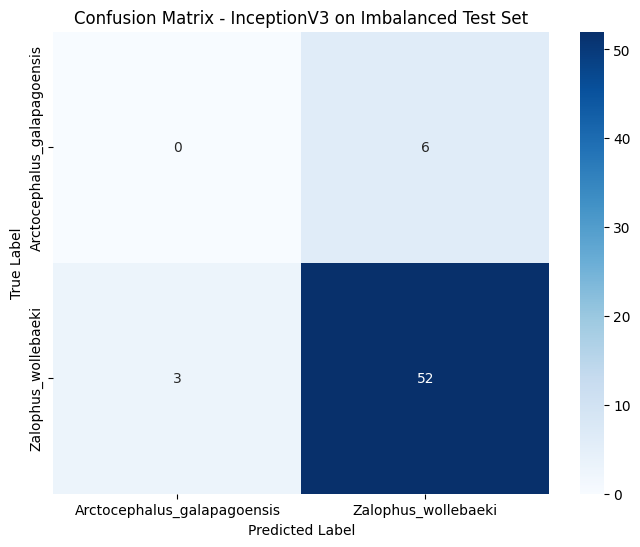

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step

Classification Report for InceptionV3 model on Imbalanced Validation Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.50      0.25      0.33         4
        Zalophus_wollebaeki       0.95      0.98      0.96        56

                   accuracy                           0.93        60
                  macro avg       0.72      0.62      0.65        60
               weighted avg       0.92      0.93      0.92        60



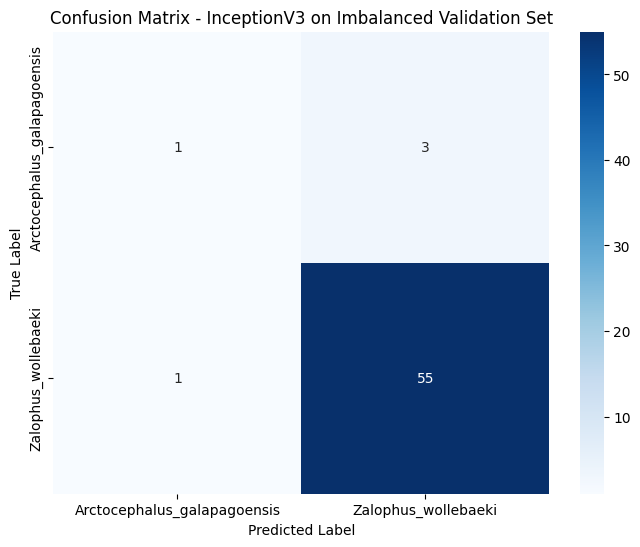

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names (assuming class_names is defined from previous steps)
if 'class_names' not in locals():
    class_names = ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']
    print(f"Using default class names: {class_names}")


# --- Evaluate on Test Set ---
# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(np.argmax(labels.numpy(), axis=1))
test_true_labels = np.array(test_true_labels)

# Get predicted labels from the InceptionV3 model on the test dataset
test_predictions = inceptionv3_model_imbalanced.predict(test_ds)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate and print the classification report for the test set
print("Classification Report for InceptionV3 model on Imbalanced Test Set:")
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_names))

# Generate confusion matrix for the test set
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Plot confusion matrix for the test set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - InceptionV3 on Imbalanced Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate on Validation Set ---
# Get true labels from the validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(np.argmax(labels.numpy(), axis=1))
val_true_labels = np.array(val_true_labels)

# Get predicted labels from the InceptionV3 model on the validation dataset
val_predictions = inceptionv3_model_imbalanced.predict(val_ds)
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Generate and print the classification report for the validation set
print("\nClassification Report for InceptionV3 model on Imbalanced Validation Set:")
print(classification_report(val_true_labels, val_predicted_labels, target_names=class_names))

# Generate confusion matrix for the validation set
val_cm = confusion_matrix(val_true_labels, val_predicted_labels)

# Plot confusion matrix for the validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - InceptionV3 on Imbalanced Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
import os
import tensorflow as tf

class CustomOversamplingGenerator(Sequence):
    """
    Custom data generator for oversampling the minority class to a specified ratio.
    """
    def __init__(self, dataset_base_path, subset, class_names, batch_size, minority_ratio=0.5, img_height=224, img_width=224):
        self.dataset_base_path = dataset_base_path
        self.subset = subset
        self.class_names = class_names
        self.batch_size = batch_size
        self.minority_ratio = minority_ratio # Ratio of minority to majority class (e.g., 0.5 for 1:2)
        self.img_height = img_height
        self.img_width = img_width
        self.class_indices = {name: i for i, name in enumerate(class_names)}
        self.image_paths = []
        self.labels = []

        # Collect all image paths and labels from the specified subset directory
        for class_name in self.class_names:
            class_dir = os.path.join(self.dataset_base_path, self.subset, class_name)
            if os.path.exists(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.image_paths.append(os.path.join(class_dir, img_name))
                        self.labels.append(self.class_indices[class_name])
            else:
                print(f"Directory not found: {class_dir}")


        # Separate indices for minority and majority classes
        # Assuming the class with fewer images is the minority class
        class_counts = {name: 0 for name in self.class_names}
        for label in self.labels:
            class_counts[self.class_names[label]] += 1

        sorted_classes = sorted(class_counts.items(), key=lambda item: item[1])
        self.minority_class_name = sorted_classes[0][0]
        self.majority_class_name = sorted_classes[-1][0]
        self.minority_count = sorted_classes[0][1]
        self.majority_count = sorted_classes[-1][1]

        self.minority_indices = [i for i, label in enumerate(self.labels) if self.class_names[label] == self.minority_class_name]
        self.majority_indices = [i for i, label in enumerate(self.labels) if self.class_names[label] == self.majority_class_name]

        print(f"Original {self.subset} set distribution:")
        print(f"  {self.minority_class_name}: {self.minority_count} images")
        print(f"  {self.majority_class_name}: {self.majority_count} images")


        self.on_epoch_end() # Initialize indices

    def __len__(self):
        # Number of batches per epoch. We'll calculate this based on the
        # target number of samples after oversampling.
        # Target minority samples = majority_count * minority_ratio
        # Total samples per epoch = majority_count + (majority_count * minority_ratio)
        target_total_samples = self.majority_count + int(self.majority_count * self.minority_ratio)
        return int(np.ceil(target_total_samples / self.batch_size))


    def __getitem__(self, index):
        # Generate one batch of data
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indices]
        batch_labels = [self.labels[i] for i in batch_indices]

        # Load and preprocess images
        batch_images = []
        batch_labels_one_hot = []
        for img_path, label in zip(batch_image_paths, batch_labels):
            img = tf.keras.utils.load_img(img_path, target_size=(self.img_height, self.img_width))
            img_array = tf.keras.utils.img_to_array(img)
            # Optional: Add preprocessing like normalization here
            img_array = img_array / 255.0 # Normalize pixel values to [0, 1]
            batch_images.append(img_array)

            # Convert labels to one-hot encoding
            one_hot_label = tf.keras.utils.to_categorical(label, num_classes=len(self.class_names))
            batch_labels_one_hot.append(one_hot_label)


        return np.array(batch_images), np.array(batch_labels_one_hot)

    def on_epoch_end(self):
        # Resample indices at the end of each epoch
        # Calculate the number of minority samples needed for the target ratio
        target_minority_samples = int(len(self.majority_indices) * self.minority_ratio)

        # Oversample minority class
        oversampled_minority_indices = np.random.choice(
            self.minority_indices,
            size=target_minority_samples,
            replace=True # Sample with replacement
        )

        # Combine oversampled minority indices with majority indices
        self.indices = np.concatenate([oversampled_minority_indices, self.majority_indices])

        # Shuffle the combined indices
        np.random.shuffle(self.indices)


# Define the base path to the cropped dataset in Google Drive
cropped_dataset_base_path = '/content/drive/MyDrive/my_galapagos_seals_cropped_dataset'

# Define image dimensions (should match the input size of the models)
img_height = 224
img_width = 224

# Define batch size
batch_size = 32

# Get class names from the previously loaded dataset or define them
# Assuming class_names are already defined from the initial dataset loading
if 'class_names' not in locals():
     class_names = ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']


# Create the oversampled training generator with a 1:2 ratio (minority_ratio=0.5)
oversampled_train_generator_1_2 = CustomOversamplingGenerator(
    dataset_base_path=cropped_dataset_base_path,
    subset='train',
    class_names=class_names,
    batch_size=batch_size,
    minority_ratio=0.5, # 1:2 ratio
    img_height=img_height,
    img_width=img_width
)

print("\nOversampled training generator (1:2 ratio) created.")
print(f"Number of batches per epoch in oversampled generator: {len(oversampled_train_generator_1_2)}")

# We will still use the original imbalanced validation and test sets for evaluation
# These were loaded as tf.data.Dataset objects in a previous step (train_ds, val_ds, test_ds)
# Let's ensure they are available or remind the user to load them if needed.
# Assuming train_ds, val_ds, test_ds are already loaded from the initial step.
# If not, you would need to regenerate that cell.

Original train set distribution:
  Arctocephalus_galapagoensis: 45 images
  Zalophus_wollebaeki: 404 images

Oversampled training generator (1:2 ratio) created.
Number of batches per epoch in oversampled generator: 19


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import json
import os

# Define the number of classes (assuming class_names is defined)
num_classes = len(class_names)

# Define the path to save the VGG16 model trained on oversampled data
save_dir_vgg16_oversampled = '/content/drive/MyDrive/GalapagosSealsMerged/classification_models/vgg16_oversampled_1_2_ratio'
os.makedirs(save_dir_vgg16_oversampled, exist_ok=True)

# Load the VGG16 model with pre-trained weights (excluding the top classification layer)
vgg16_base_oversampled = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
vgg16_base_oversampled.trainable = False

# Create the VGG16 classification model for oversampled data
vgg16_model_oversampled = Sequential([
    vgg16_base_oversampled,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
vgg16_model_oversampled.compile(optimizer=Adam(learning_rate=0.001),
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

# Print the model summary
vgg16_model_oversampled.summary()


# Define callbacks for training (optional but recommended)
callbacks_vgg16_oversampled = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir_vgg16_oversampled, 'best_vgg16_oversampled_model.h5'),
                                       monitor='val_loss',
                                       save_best_only=True)
]

print("\nTraining VGG16 model on oversampled dataset (1:2 ratio)...")

# Train the VGG16 model on the oversampled dataset using the custom generator
history_vgg16_oversampled = vgg16_model_oversampled.fit(
    oversampled_train_generator_1_2, # Use the oversampled generator
    epochs=50, # You can adjust the number of epochs
    validation_data=val_ds, # Use the original imbalanced validation set
    callbacks=callbacks_vgg16_oversampled
)

# Save the trained model (best weights)
vgg16_model_oversampled.save(os.path.join(save_dir_vgg16_oversampled, 'final_vgg16_oversampled_model.h5'))

# Save the model configuration
model_config_vgg16_oversampled = vgg16_model_oversampled.to_json()
with open(os.path.join(save_dir_vgg16_oversampled, 'vgg16_oversampled_config.json'), 'w') as f:
    json.dump(json.loads(model_config_vgg16_oversampled), f, indent=4)

print(f"\nVGG16 model for oversampled dataset trained and saved to {save_dir_vgg16_oversampled}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG16 model on oversampled dataset (1:2 ratio)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.6121 - loss: 2.9873

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6151 - loss: 2.9315 - val_accuracy: 0.9500 - val_loss: 1.2490
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.8738 - loss: 0.2728 - val_accuracy: 0.9333 - val_loss: 6.6463
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.9446 - loss: 0.1632 - val_accuracy: 0.9333 - val_loss: 7.7509
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.9762 - loss: 0.0823 - val_accuracy: 0.9333 - val_loss: 7.4110
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9936 - loss: 0.0413 - val_accuracy: 0.9333 - val_loss: 8.7281
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.9961 - loss: 0.0311 - val_accuracy: 0.9333 - val_loss: 8.5096
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.9984 - loss: 0.0273 - val_accuracy: 0.9333 - val_loss: 9.2423
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.9982 - loss: 0.0170 - val_accuracy: 0.9333 - val_lo


VGG16 model for oversampled dataset trained and saved to /content/drive/MyDrive/GalapagosSealsMerged/classification_models/vgg16_oversampled_1_2_ratio


In [ ]:
# Evaluate the VGG16 model on the oversampled validation set
print("Evaluating VGG16 model on the oversampled validation set:")
val_loss_vgg16_oversampled, val_accuracy_vgg16_oversampled = vgg16_model_oversampled.evaluate(val_ds)
print(f"Validation Loss (Oversampled): {val_loss_vgg16_oversampled:.4f}")
print(f"Validation Accuracy (Oversampled): {val_accuracy_vgg16_oversampled:.4f}")

# Evaluate the VGG16 model on the oversampled test set
print("\nEvaluating VGG16 model on the oversampled test set:")
test_loss_vgg16_oversampled, test_accuracy_vgg16_oversampled = vgg16_model_oversampled.evaluate(test_ds)
print(f"Test Loss (Oversampled): {test_loss_vgg16_oversampled:.4f}")
print(f"Test Accuracy (Oversampled): {test_accuracy_vgg16_oversampled:.4f}")

Evaluating VGG16 model on the oversampled validation set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9563 - loss: 1.1891
Validation Loss (Oversampled): 1.2490
Validation Accuracy (Oversampled): 0.9500

Evaluating VGG16 model on the oversampled test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step - accuracy: 0.8600 - loss: 5.5128
Test Loss (Oversampled): 5.4538
Test Accuracy (Oversampled): 0.8525


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 771ms/step
Classification Report for VGG16 model on Oversampled Test Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.36      0.67      0.47         6
        Zalophus_wollebaeki       0.96      0.87      0.91        55

                   accuracy                           0.85        61
                  macro avg       0.66      0.77      0.69        61
               weighted avg       0.90      0.85      0.87        61



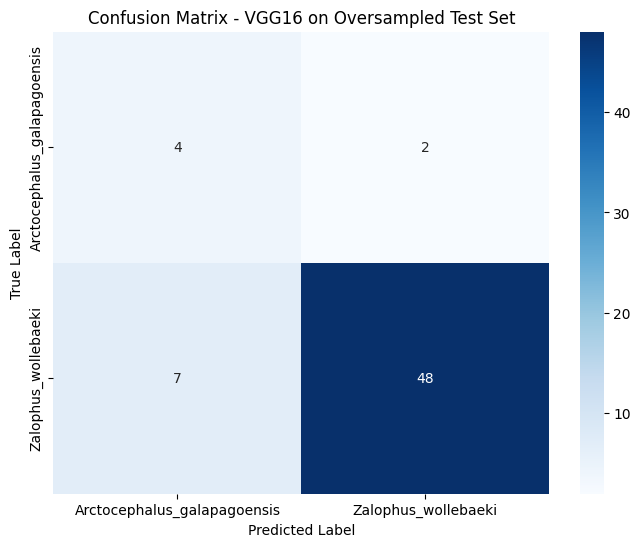

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step

Classification Report for VGG16 model on Oversampled Validation Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.57      1.00      0.73         4
        Zalophus_wollebaeki       1.00      0.95      0.97        56

                   accuracy                           0.95        60
                  macro avg       0.79      0.97      0.85        60
               weighted avg       0.97      0.95      0.96        60



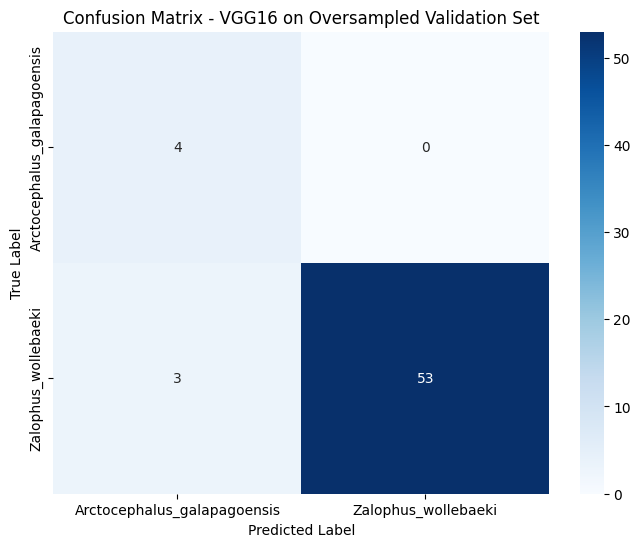

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names (assuming class_names is defined from previous steps)
if 'class_names' not in locals():
    class_names = ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']
    print(f"Using default class names: {class_names}")

# --- Evaluate on Test Set ---
# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(np.argmax(labels.numpy(), axis=1))
test_true_labels = np.array(test_true_labels)

# Get predicted labels from the VGG16 oversampled model on the test dataset
test_predictions_oversampled_vgg16 = vgg16_model_oversampled.predict(test_ds)
test_predicted_labels_oversampled_vgg16 = np.argmax(test_predictions_oversampled_vgg16, axis=1)

# Generate and print the classification report for the test set
print("Classification Report for VGG16 model on Oversampled Test Set:")
print(classification_report(test_true_labels, test_predicted_labels_oversampled_vgg16, target_names=class_names))

# Generate confusion matrix for the test set
test_cm_oversampled_vgg16 = confusion_matrix(test_true_labels, test_predicted_labels_oversampled_vgg16)

# Plot confusion matrix for the test set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm_oversampled_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG16 on Oversampled Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate on Validation Set ---
# Get true labels from the validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(np.argmax(labels.numpy(), axis=1))
val_true_labels = np.array(val_true_labels)

# Get predicted labels from the VGG16 oversampled model on the validation dataset
val_predictions_oversampled_vgg16 = vgg16_model_oversampled.predict(val_ds)
val_predicted_labels_oversampled_vgg16 = np.argmax(val_predictions_oversampled_vgg16, axis=1)

# Generate and print the classification report for the validation set
print("\nClassification Report for VGG16 model on Oversampled Validation Set:")
print(classification_report(val_true_labels, val_predicted_labels_oversampled_vgg16, target_names=class_names))

# Generate confusion matrix for the validation set
val_cm_oversampled_vgg16 = confusion_matrix(val_true_labels, val_predicted_labels_oversampled_vgg16)

# Plot confusion matrix for the validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm_oversampled_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG16 on Oversampled Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
import json
import os

# Define the number of classes (assuming class_names is defined)
num_classes = len(class_names)

# Define the path to save the ResNet50V2 model trained on oversampled data
save_dir_resnet_oversampled = '/content/drive/MyDrive/GalapagosSealsMerged/classification_models/resnet50v2_oversampled_1_2_ratio'
os.makedirs(save_dir_resnet_oversampled, exist_ok=True)

# Load the ResNet50V2 model with pre-trained weights (excluding the top classification layer)
resnet_base_oversampled = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
resnet_base_oversampled.trainable = False

# Create the ResNet50V2 classification model for oversampled data
resnet_model_oversampled = Sequential([
    resnet_base_oversampled,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
resnet_model_oversampled.compile(optimizer=Adam(learning_rate=0.001),
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

# Print the model summary
resnet_model_oversampled.summary()


# Define callbacks for training (optional but recommended)
callbacks_resnet_oversampled = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir_resnet_oversampled, 'best_resnet50v2_oversampled_model.h5'),
                                       monitor='val_loss',
                                       save_best_only=True)
]

print("\nTraining ResNet50V2 model on oversampled dataset (1:2 ratio)...")

# Train the ResNet50V2 model on the oversampled dataset using the custom generator
history_resnet_oversampled = resnet_model_oversampled.fit(
    oversampled_train_generator_1_2, # Use the oversampled generator
    epochs=50, # You can adjust the number of epochs
    validation_data=val_ds, # Use the original imbalanced validation set
    callbacks=callbacks_resnet_oversampled
)

# Save the trained model (best weights)
resnet_model_oversampled.save(os.path.join(save_dir_resnet_oversampled, 'final_resnet50v2_oversampled_model.h5'))

# Save the model configuration
model_config_resnet_oversampled = resnet_model_oversampled.to_json()
with open(os.path.join(save_dir_resnet_oversampled, 'resnet50v2_oversampled_config.json'), 'w') as f:
    json.dump(json.loads(model_config_resnet_oversampled), f, indent=4)

print(f"\nResNet50V2 model for oversampled dataset trained and saved to {save_dir_resnet_oversampled}")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,255,682 (187.90 MB)

 Trainable params: 25,690,882 (98.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)


Training ResNet50V2 model on oversampled dataset (1:2 ratio)...
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.6391 - loss: 21.4459

19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6439 - loss: 20.9451 - val_accuracy: 0.9333 - val_loss: 85.5001
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9087 - loss: 0.7443

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.9092 - loss: 0.7312 - val_accuracy: 0.9333 - val_loss: 55.4357
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.9592 - loss: 0.1040 - val_accuracy: 0.9333 - val_loss: 79.0002
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9863 - loss: 0.0643 - val_accuracy: 0.9333 - val_loss: 93.8345
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 582ms/step - accuracy: 0.9804 - loss: 0.0492 - val_accuracy: 0.9333 - val_loss: 103.8308
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9832 - loss: 0.0570 - val_accuracy: 0.9333 - val_loss: 111.3699
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9890 - loss: 0.0460 - val_accuracy: 0.9333 - val_loss: 116.6188
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.9901 - loss: 0.0361 - val_accuracy: 0.9333 - val_loss: 124.9758
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9943 - loss: 0.0435 - val_accuracy: 


ResNet50V2 model for oversampled dataset trained and saved to /content/drive/MyDrive/GalapagosSealsMerged/classification_models/resnet50v2_oversampled_1_2_ratio


In [ ]:
# Evaluate the ResNet50V2 model on the imbalanced validation set
print("Evaluating ResNet50V2 model on the imbalanced validation set:")
val_loss_resnet_oversampled, val_accuracy_resnet_oversampled = resnet_model_oversampled.evaluate(val_ds)
print(f"Validation Loss (Oversampled): {val_loss_resnet_oversampled:.4f}")
print(f"Validation Accuracy (Oversampled): {val_accuracy_resnet_oversampled:.4f}")

# Evaluate the ResNet50V2 model on the imbalanced test set
print("\nEvaluating ResNet50V2 model on the imbalanced test set:")
test_loss_resnet_oversampled, test_accuracy_resnet_oversampled = resnet_model_oversampled.evaluate(test_ds)
print(f"Test Loss (Oversampled): {test_loss_resnet_oversampled:.4f}")
print(f"Test Accuracy (Oversampled): {test_accuracy_resnet_oversampled:.4f}")

Evaluating ResNet50V2 model on the imbalanced validation set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9139 - loss: 71.6045
Validation Loss (Oversampled): 55.4357
Validation Accuracy (Oversampled): 0.9333

Evaluating ResNet50V2 model on the imbalanced test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8719 - loss: 158.9463
Test Loss (Oversampled): 122.0708
Test Accuracy (Oversampled): 0.9016


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
Classification Report for ResNet50V2 model on Oversampled Test Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         6
        Zalophus_wollebaeki       0.90      1.00      0.95        55

                   accuracy                           0.90        61
                  macro avg       0.45      0.50      0.47        61
               weighted avg       0.81      0.90      0.86        61



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


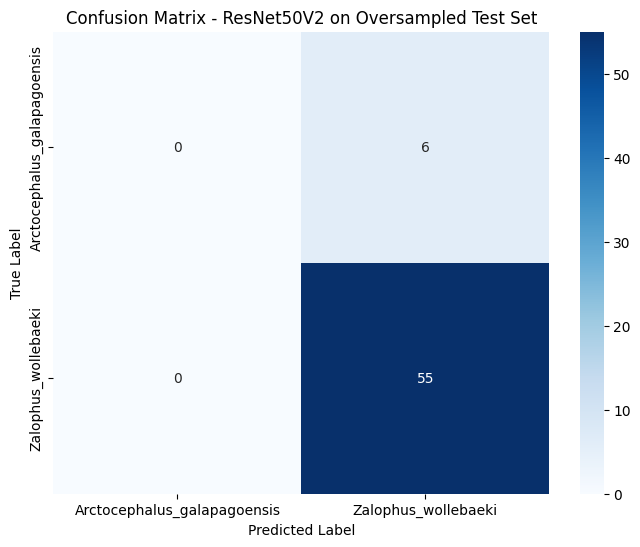

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step

Classification Report for ResNet50V2 model on Oversampled Validation Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         4
        Zalophus_wollebaeki       0.93      1.00      0.97        56

                   accuracy                           0.93        60
                  macro avg       0.47      0.50      0.48        60
               weighted avg       0.87      0.93      0.90        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


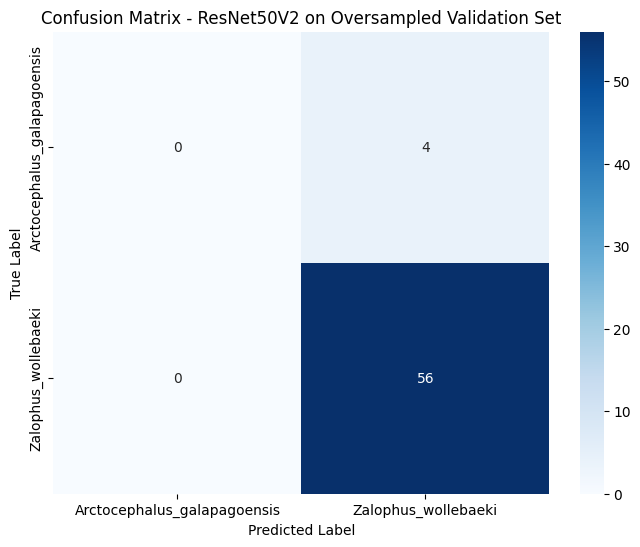

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names (assuming class_names is defined from previous steps)
if 'class_names' not in locals():
    class_names = ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']
    print(f"Using default class names: {class_names}")

# --- Evaluate on Test Set ---
# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(np.argmax(labels.numpy(), axis=1))
test_true_labels = np.array(test_true_labels)

# Get predicted labels from the ResNet50V2 oversampled model on the test dataset
test_predictions_oversampled_resnet = resnet_model_oversampled.predict(test_ds)
test_predicted_labels_oversampled_resnet = np.argmax(test_predictions_oversampled_resnet, axis=1)

# Generate and print the classification report for the test set
print("Classification Report for ResNet50V2 model on Oversampled Test Set:")
print(classification_report(test_true_labels, test_predicted_labels_oversampled_resnet, target_names=class_names))

# Generate confusion matrix for the test set
test_cm_oversampled_resnet = confusion_matrix(test_true_labels, test_predicted_labels_oversampled_resnet)

# Plot confusion matrix for the test set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm_oversampled_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - ResNet50V2 on Oversampled Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate on Validation Set ---
# Get true labels from the validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(np.argmax(labels.numpy(), axis=1))
val_true_labels = np.array(val_true_labels)

# Get predicted labels from the ResNet50V2 oversampled model on the validation dataset
val_predictions_oversampled_resnet = resnet_model_oversampled.predict(val_ds)
val_predicted_labels_oversampled_resnet = np.argmax(val_predictions_oversampled_resnet, axis=1)

# Generate and print the classification report for the validation set
print("\nClassification Report for ResNet50V2 model on Oversampled Validation Set:")
print(classification_report(val_true_labels, val_predicted_labels_oversampled_resnet, target_names=class_names))

# Generate confusion matrix for the validation set
val_cm_oversampled_resnet = confusion_matrix(val_true_labels, val_predicted_labels_oversampled_resnet)

# Plot confusion matrix for the validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm_oversampled_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - ResNet50V2 on Oversampled Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
import json
import os

# Define the number of classes (assuming class_names is defined)
num_classes = len(class_names)

# Define the path to save the InceptionV3 model trained on oversampled data
save_dir_inceptionv3_oversampled = '/content/drive/MyDrive/GalapagosSealsMerged/classification_models/inceptionv3_oversampled_1_2_ratio'
os.makedirs(save_dir_inceptionv3_oversampled, exist_ok=True)

# Load the InceptionV3 model with pre-trained weights (excluding the top classification layer)
# InceptionV3 expects input shape of at least 75x75
inceptionv3_base_oversampled = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
inceptionv3_base_oversampled.trainable = False

# Create the InceptionV3 classification model for oversampled data
inceptionv3_model_oversampled = Sequential([
    inceptionv3_base_oversampled,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

# Compile the model
inceptionv3_model_oversampled.compile(optimizer=Adam(learning_rate=0.001),
                                     loss='categorical_crossentropy',
                                     metrics=['accuracy'])

# Print the model summary
inceptionv3_model_oversampled.summary()


# Define callbacks for training (optional but recommended)
callbacks_inceptionv3_oversampled = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir_inceptionv3_oversampled, 'best_inceptionv3_oversampled_model.h5'),
                                       monitor='val_loss',
                                       save_best_only=True)
]

print("\nTraining InceptionV3 model on oversampled dataset (1:2 ratio)...")

# Train the InceptionV3 model on the oversampled dataset using the custom generator
history_inceptionv3_oversampled = inceptionv3_model_oversampled.fit(
    oversampled_train_generator_1_2, # Use the oversampled generator
    epochs=50, # You can adjust the number of epochs
    validation_data=val_ds, # Use the original imbalanced validation set
    callbacks=callbacks_inceptionv3_oversampled
)

# Save the trained model (best weights)
inceptionv3_model_oversampled.save(os.path.join(save_dir_inceptionv3_oversampled, 'final_inceptionv3_oversampled_model.h5'))

# Save the model configuration
model_config_inceptionv3_oversampled = inceptionv3_model_oversampled.to_json()
with open(os.path.join(save_dir_inceptionv3_oversampled, 'inceptionv3_oversampled_config.json'), 'w') as f:
    json.dump(json.loads(model_config_inceptionv3_oversampled), f, indent=4)

print(f"\nInceptionV3 model for oversampled dataset trained and saved to {save_dir_inceptionv3_oversampled}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,910,754 (133.17 MB)

 Trainable params: 13,107,970 (50.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)


Training InceptionV3 model on oversampled dataset (1:2 ratio)...
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.6621 - loss: 12.6451

19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6647 - loss: 12.5623 - val_accuracy: 0.9333 - val_loss: 21.0672
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.8937 - loss: 2.5960 - val_accuracy: 0.9333 - val_loss: 23.2778
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.9765 - loss: 0.2206 - val_accuracy: 0.9333 - val_loss: 30.8663
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9853 - loss: 0.0960 - val_accuracy: 0.9333 - val_loss: 38.5387
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.9913 - loss: 0.0764 - val_accuracy: 0.9333 - val_loss: 34.1818
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9851 - loss: 0.0551 - val_accuracy: 0.9333 - val_loss: 30.3726
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 1.0000 - loss: 5.7142e-04 - val_accuracy: 0.9333 - val_loss: 30.4398
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 1.0000 - loss: 7.6383e-04 - val_accuracy:


InceptionV3 model for oversampled dataset trained and saved to /content/drive/MyDrive/GalapagosSealsMerged/classification_models/inceptionv3_oversampled_1_2_ratio


In [ ]:
# Evaluate the InceptionV3 model on the imbalanced validation set
print("Evaluating InceptionV3 model on the imbalanced validation set:")
val_loss_inceptionv3_oversampled, val_accuracy_inceptionv3_oversampled = inceptionv3_model_oversampled.evaluate(val_ds)
print(f"Validation Loss (Oversampled): {val_loss_inceptionv3_oversampled:.4f}")
print(f"Validation Accuracy (Oversampled): {val_accuracy_inceptionv3_oversampled:.4f}")

# Evaluate the InceptionV3 model on the imbalanced test set
print("\nEvaluating InceptionV3 model on the imbalanced test set:")
test_loss_inceptionv3_oversampled, test_accuracy_inceptionv3_oversampled = inceptionv3_model_oversampled.evaluate(test_ds)
print(f"Test Loss (Oversampled): {test_loss_inceptionv3_oversampled:.4f}")
print(f"Test Accuracy (Oversampled): {test_accuracy_inceptionv3_oversampled:.4f}")

Evaluating InceptionV3 model on the imbalanced validation set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9139 - loss: 27.2117
Validation Loss (Oversampled): 21.0672
Validation Accuracy (Oversampled): 0.9333

Evaluating InceptionV3 model on the imbalanced test set:
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8610 - loss: 40.7390
Test Loss (Oversampled): 31.3479
Test Accuracy (Oversampled): 0.8852


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step
Classification Report for InceptionV3 model on Oversampled Test Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         6
        Zalophus_wollebaeki       0.90      0.98      0.94        55

                   accuracy                           0.89        61
                  macro avg       0.45      0.49      0.47        61
               weighted avg       0.81      0.89      0.85        61



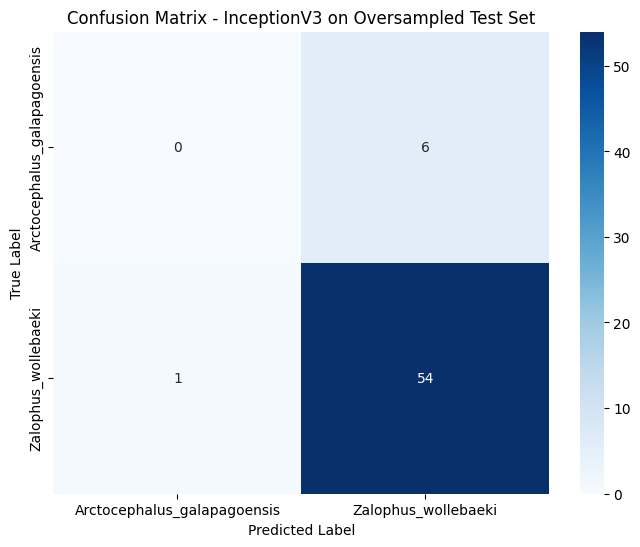

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Classification Report for InceptionV3 model on Oversampled Validation Set:
                             precision    recall  f1-score   support

Arctocephalus_galapagoensis       0.00      0.00      0.00         4
        Zalophus_wollebaeki       0.93      1.00      0.97        56

                   accuracy                           0.93        60
                  macro avg       0.47      0.50      0.48        60
               weighted avg       0.87      0.93      0.90        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


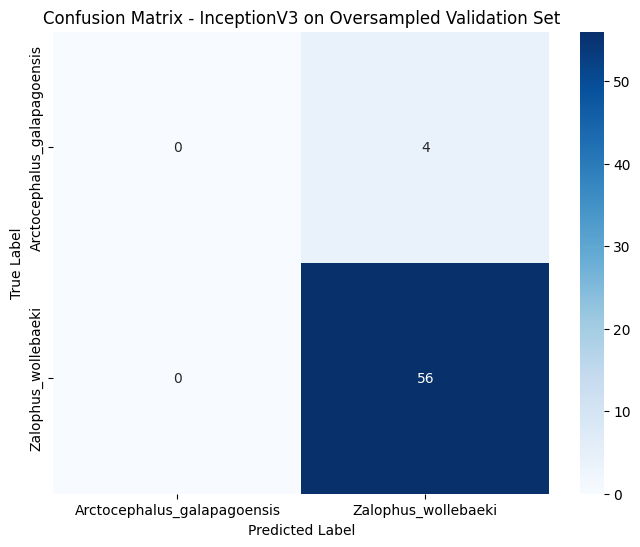

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names (assuming class_names is defined from previous steps)
if 'class_names' not in locals():
    class_names = ['Arctocephalus_galapagoensis', 'Zalophus_wollebaeki']
    print(f"Using default class names: {class_names}")

# --- Evaluate on Test Set ---
# Get true labels from the test dataset
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(np.argmax(labels.numpy(), axis=1))
test_true_labels = np.array(test_true_labels)

# Get predicted labels from the InceptionV3 oversampled model on the test dataset
test_predictions_oversampled_inceptionv3 = inceptionv3_model_oversampled.predict(test_ds)
test_predicted_labels_oversampled_inceptionv3 = np.argmax(test_predictions_oversampled_inceptionv3, axis=1)

# Generate and print the classification report for the test set
print("Classification Report for InceptionV3 model on Oversampled Test Set:")
print(classification_report(test_true_labels, test_predicted_labels_oversampled_inceptionv3, target_names=class_names))

# Generate confusion matrix for the test set
test_cm_oversampled_inceptionv3 = confusion_matrix(test_true_labels, test_predicted_labels_oversampled_inceptionv3)

# Plot confusion matrix for the test set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm_oversampled_inceptionv3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - InceptionV3 on Oversampled Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate on Validation Set ---
# Get true labels from the validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(np.argmax(labels.numpy(), axis=1))
val_true_labels = np.array(val_true_labels)

# Get predicted labels from the InceptionV3 oversampled model on the validation dataset
val_predictions_oversampled_inceptionv3 = inceptionv3_model_oversampled.predict(val_ds)
val_predicted_labels_oversampled_inceptionv3 = np.argmax(val_predictions_oversampled_inceptionv3, axis=1)

# Generate and print the classification report for the validation set
print("\nClassification Report for InceptionV3 model on Oversampled Validation Set:")
print(classification_report(val_true_labels, val_predicted_labels_oversampled_inceptionv3, target_names=class_names))

# Generate confusion matrix for the validation set
val_cm_oversampled_inceptionv3 = confusion_matrix(val_true_labels, val_predicted_labels_oversampled_inceptionv3)

# Plot confusion matrix for the validation set using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm_oversampled_inceptionv3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - InceptionV3 on Oversampled Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()